<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw4/Dellorco_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#package I will use for constants and units conversion
import astropy
from astropy.constants import G
from astropy import units as u

#package used to display latex formuale
from IPython.display import Latex



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', sep=',', skiprows=2, names=['R(kpc)','V(km/s)','St.dev.','St.error'])

In [3]:
m31.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [4]:
m31.shape

(55, 4)

In [5]:
m31.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


Text(0.5, 1.0, 'Andromeda V vs. R')

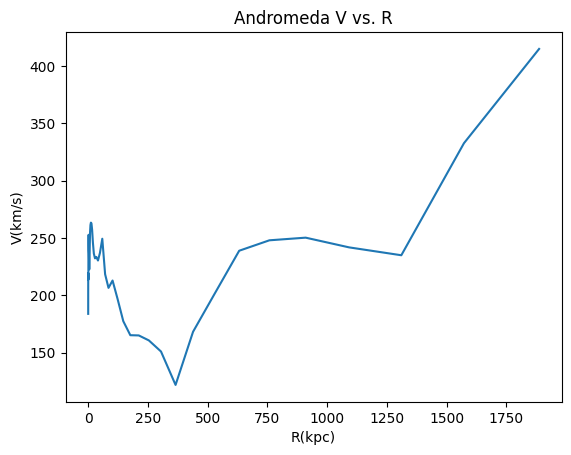

In [6]:
plt.plot(m31['R(kpc)'],m31['V(km/s)'])
plt.ylabel('V(km/s)')
plt.xlabel('R(kpc)')
plt.title('Andromeda V vs. R')

Figure 1: This graphs the V vs. R for Andromeda in order to get a visualization of the data.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [7]:
d = 765 * u.kiloparsec #kparsec
alpha = 3.167 * u.degree
d_error= 28 * u.kiloparsec
r=d/2
r_error=d_error/2
r= r*np.sin(alpha)
r
#it's a right triangle, the opposite side is d, the hypot. is r, and the angle is alpha

<Quantity 21.13176145 kpc>

In [8]:
r_error=r*(r_error/r)
r_error

<Quantity 14. kpc>

In [9]:
print("Angular Size of the visible component of Andromeda: {:.2f}".format(alpha.to(u.rad)))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [10]:
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(r, r_error))#, m31SizeError


Size of the visible component of Andromeda: 21 kpc +/- 14.0 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the velocity at that radius?
You can do it by broadcasting (see homework 3)

In [11]:
m31_filtered=m31[m31['R(kpc)']>=r].copy()
m31_filtered=m31_filtered.reset_index(drop=True)
m31_filtered.head()

,R(kpc),V(km/s),St.dev.,St.error
0,23.738,236.511,11.729,1.580
1,28.485,232.335,16.577,2.106
2,34.182,233.530,27.353,3.826
3,41.019,230.444,52.432,9.815
4,49.222,237.069,109.381,23.924


In [12]:
smallR_index=m31_filtered['R(kpc)'].idxmin()
smallR_index

0

In [13]:
smallR=m31_filtered.iloc[smallR_index, 0]
smallV=m31_filtered.iloc[smallR_index, 1]
print('Smallest radius in your data where the luminous mass is completely included: ',smallR)
print('Velocity at that radius: ',smallV)

Smallest radius in your data where the luminous mass is completely included:  23.738
Velocity at that radius:  236.511


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [14]:
def getradii(df, N, size):
  """
    Retrieve the radius, velocity, uncertainty, and luminous radius for a specified dataset.

    Parameters:
        df (DataFrame): The dataset containing radius and velocity information.
        N: The number of times the luminous radius size to consider.
        size: The size of the luminous radius.

    Returns:
        The radius (R) at least as large as N times the luminous radius.
        The velocity (V) at the retrieved radius.
        The uncertainty (dv) in the velocity measurement.
        The uncertainty (dr) in the radius measurement.

    This function retrieves the radius, velocity, and associated uncertainties from the dataset for
    a radius that is N times the specified luminous radius.
  """
  R_row=df[df['R(kpc)']>=N*size]
  R, V, dv, dr=R_row.iloc[0]
  return R,V,dv,dr


In [15]:
N=2
rN,vN,dvN,drN=getradii(m31, N, r)
print("When N is",N,", the smallest radius is",rN,"+/-", drN, "kpc")
print("And the corresponding velocity is",vN,"+/-",dvN, "km/s")

When N is 2 , the smallest radius is 49.222 +/- 23.924 kpc
And the corresponding velocity is 237.069 +/- 109.381 km/s


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [16]:
r1,v1,dv1,dr1=getradii(m31, 1, r)
r2,v2,dv2,dr2=getradii(m31, 2, r)
r3,v3,dv3,dr3=getradii(m31, 3, r)

In [17]:
G=6.67*10**-11
M=2*10**42

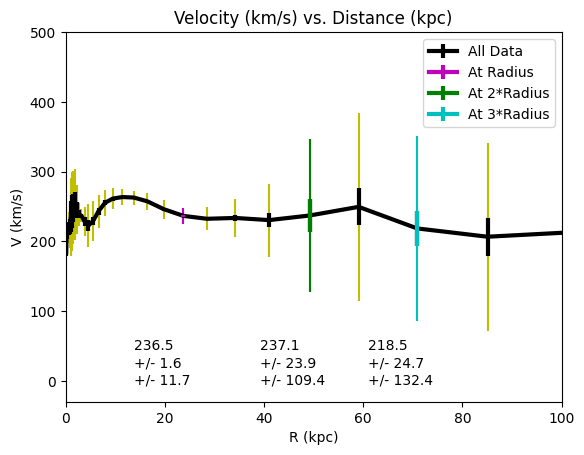

In [18]:
plt.errorbar(m31['R(kpc)'],m31['V(km/s)'], m31['St.error'],zorder=5,color='k',linewidth=3,label="All Data")
plt.errorbar(m31['R(kpc)'],m31['V(km/s)'], m31['St.dev.'],color='y')
plt.xlim(0,100)
plt.ylim(-30,500)
plt.errorbar(r1,v1,dr1,zorder=10, color='m',linewidth=3,label = 'At Radius')
plt.errorbar(r1,v1,dv1,color='m')
plt.errorbar(r2,v2,dr2,zorder=10,color='g', linewidth=3,label = 'At 2*Radius')
plt.errorbar(r2,v2,dv2,color='g')
plt.errorbar(r3,v3,dr3,zorder=10,color='c', linewidth=3, label = 'At 3*Radius')
plt.errorbar(r3,v3,dv3,color='c')
plt.legend(loc = 'upper right')
plt.xlabel("R (kpc)")
plt.ylabel("V (km/s)")
plt.title("Velocity (km/s) vs. Distance (kpc)")
plt.text(r1-10,45, r"{:.1f}".format(v1))
plt.text(r1-10,20, "+/- {:.1f}".format(dr1))
plt.text(r1-10,-5, "+/- {:.1f}".format(dv1))
plt.text(r2-10,45, r"{:.1f}".format(v2))
plt.text(r2-10,20, "+/- {:.1f}".format(dr2))
plt.text(r2-10,-5, "+/- {:.1f}".format(dv2))
plt.text(r3-10,45, r"{:.1f}".format(v3))
plt.text(r3-10,20, "+/- {:.1f}".format(dr3))
plt.text(r3-10,-5, "+/- {:.1f}".format(dv3))
plt.show()


Figure 2: This plots V vs. R for Andromeda but unlike Figure 1 it includes error bars for velocity and distance. Yellow signifies velocity and black signifies distance. The point for the smallest radius in the data where the luminous mass is completely included is colored pink, the point for twice that same radius is colored green, and the point for thrice that same radius is colored blue. Given the theoretical expectation of $V=\sqrt{\frac{GM}{R}}$, we see this is not what occurs in the graph. The velocity value stays somewhat constant despite changes in R, which exemplifies the existance of dark matter, which makes up for the difference of the theoretical vs. the experienced V vs. R.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [19]:
def vratios(df, N, size):
  """
    Calculate and compare the expected and calculated velocity ratios for N times the luminous radius compared to the luminous radius.

    Parameters:
        df (DataFrame): The dataset containing radius and velocity information.
        N: The number of times the luminous radius size for which to calculate the ratios.
        size: The size of the luminous radius.

    Returns:
        None

    This function calculates the expected and actual velocity ratios for N times the luminous radius from the center
    and checks whether the expected ratio falls within a 2-sigma range of the calculated ratio.
  """
  r_1, v_1, dv_1, dr_1=getradii(df,1,size)
  r, v, dv, dr=getradii(df,N,size)
  ratio_expected=np.sqrt(r/r_1)
  #because using v=sqrt(GM/r), we find the ratio is r/r_1=v_1^2/v^2
  ratio_actual=v_1/v
  sigma = ratio_actual*np.sqrt((dv_1/v_1)**2+(dv/v)**2)
  upper_range=ratio_actual+2*sigma
  lower_range=ratio_actual-2*sigma
  agree="" if ratio_expected <= upper_range and ratio_expected >= lower_range else "not"
  print(f"The expected ratio of V for N=1 and V for N={N} is {ratio_expected:.5f}")
  print(f"The calculated ratio of V for N=1 and V for N={N} is {ratio_actual:.5f} +/- {sigma:.2f}")
  print(f"The upper bound of the error range for the calculated ratio is {upper_range:.5f} and the lower bound is {lower_range:.5f}, using twice the uncertainty to create the bounds.")
  print(f"The expected range is{agree} within that given range of the calculated ratio.")


In [20]:
vratios(m31, 1, r)

The expected ratio of V for N=1 and V for N=1 is 1.00000
The calculated ratio of V for N=1 and V for N=1 is 1.00000 +/- 0.07
The upper bound of the error range for the calculated ratio is 1.14027 and the lower bound is 0.85973, using twice the uncertainty to create the bounds.
The expected range is within that given range of the calculated ratio.


In [21]:
vratios(m31, 2, r)

The expected ratio of V for N=1 and V for N=2 is 1.43998
The calculated ratio of V for N=1 and V for N=2 is 0.99765 +/- 0.46
The upper bound of the error range for the calculated ratio is 1.92355 and the lower bound is 0.07174, using twice the uncertainty to create the bounds.
The expected range is within that given range of the calculated ratio.


In [22]:
vratios(m31, 3, r)

The expected ratio of V for N=1 and V for N=3 is 1.72798
The calculated ratio of V for N=1 and V for N=3 is 1.08248 +/- 0.66
The upper bound of the error range for the calculated ratio is 2.39835 and the lower bound is -0.23339, using twice the uncertainty to create the bounds.
The expected range is within that given range of the calculated ratio.


Obviously, for N=1, since it is $\frac{v_N}{v_N}$, it will be equal to 1 and the expected range will be within the calculated ratio. The other N values fall within the expected range as well, and the ratio is consistent within the uncertainties with Newton's law $v \propto \frac{GM}{\sqrt{r}}$. This would suggest it is a good fit, contrary to Figure 2.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [23]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv', sep=',', skiprows=2, names=['R(kpc)','V(km/s)','St.dev.','St.error'])

In [24]:
mw.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [25]:
mw.shape

(64, 4)

In [26]:
mw.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


Text(0.5, 0, 'R(kpc)')

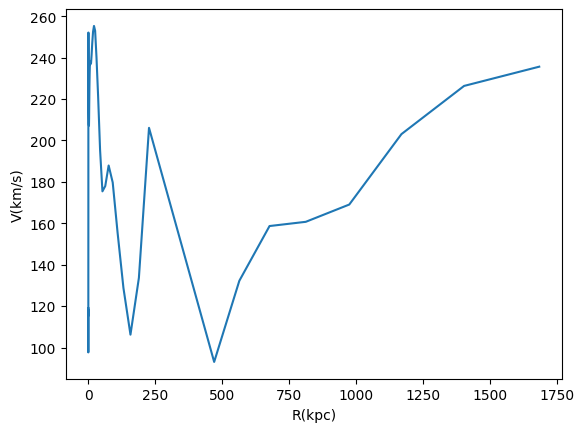

In [27]:
plt.plot(mw['R(kpc)'],mw['V(km/s)'])
plt.ylabel('V(km/s)')
plt.xlabel('R(kpc)')

Figure 3: This graphs the V vs. R for the Milky Way in order to get a visualization of the data.

In [28]:
diammw = 26.8 * u.kiloparsec
diammw_error=1.1 * u.kiloparsec
dmw=diammw/2
dmw_error=diammw_error/2

In [29]:
print("Size of the visible component of Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(dmw, dmw_error))#, mwSizeError

Size of the visible component of Andromeda: 13.4 kpc +/- 0.6 kpc


In [30]:
mw_filtered=mw[mw['R(kpc)']>=dmw].copy()
mw_filtered=mw_filtered.reset_index(drop=True)
mw_filtered.head()

,R(kpc),V(km/s),St.dev.,St.error
0,14.698,247.075,42.102,4.069
1,17.637,252.483,49.524,6.235
2,21.165,255.300,58.570,9.816
3,25.398,252.966,66.790,14.565
4,30.477,240.165,74.879,20.538


In [31]:
smallRmw_index=mw_filtered['R(kpc)'].idxmin()

In [32]:
smallRmw=mw_filtered.iloc[smallRmw_index, 0]
smallVmw=mw_filtered.iloc[smallRmw_index, 1]
print('Smallest radius in your data where the luminous mass is completely included: ',smallRmw)
print('Velocity at that radius: ',smallVmw)

Smallest radius in your data where the luminous mass is completely included:  14.698
Velocity at that radius:  247.075


In [33]:
rmw1,vmw1,dvmw1,drmw1=getradii(mw, 1, dmw)
rmw2,vmw2,dvmw2,drmw2=getradii(mw, 2, dmw)
rmw3,vmw3,dvmw3,drmw3=getradii(mw, 3, dmw)

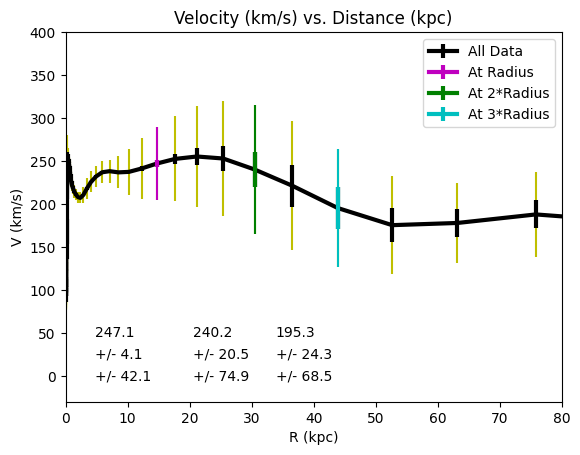

In [34]:
plt.errorbar(mw['R(kpc)'],mw['V(km/s)'], mw['St.error'],zorder=5,color='k',linewidth=3,label="All Data")
plt.errorbar(mw['R(kpc)'],mw['V(km/s)'], mw['St.dev.'],color='y')
plt.xlim(0,80)
plt.ylim(-30,400)
plt.errorbar(rmw1,vmw1,drmw1,zorder=10, color='m',linewidth=3,label = 'At Radius')
plt.errorbar(rmw1,vmw1,dvmw1,color='m')
plt.errorbar(rmw2,vmw2,drmw2,zorder=10,color='g', linewidth=3,label = 'At 2*Radius')
plt.errorbar(rmw2,vmw2,dvmw2,color='g')
plt.errorbar(rmw3,vmw3,drmw3,zorder=10,color='c', linewidth=3, label = 'At 3*Radius')
plt.errorbar(rmw3,vmw3,dvmw3,color='c')
plt.legend(loc = 'upper right')
plt.xlabel("R (kpc)")
plt.ylabel("V (km/s)")
plt.title("Velocity (km/s) vs. Distance (kpc)")
plt.text(rmw1-10,45, r"{:.1f}".format(vmw1))
plt.text(rmw1-10,20, "+/- {:.1f}".format(drmw1))
plt.text(rmw1-10,-5, "+/- {:.1f}".format(dvmw1))
plt.text(rmw2-10,45, r"{:.1f}".format(vmw2))
plt.text(rmw2-10,20, "+/- {:.1f}".format(drmw2))
plt.text(rmw2-10,-5, "+/- {:.1f}".format(dvmw2))
plt.text(rmw3-10,45, r"{:.1f}".format(vmw3))
plt.text(rmw3-10,20, "+/- {:.1f}".format(drmw3))
plt.text(rmw3-10,-5, "+/- {:.1f}".format(dvmw3))
plt.show()

Figure 4: This plots V vs. R for the Milky Way but unlike Figure 3 it includes error bars for velocity and distance. Yellow signifies velocity and black signifies distance. The point for the smallest radius in the data where the luminous mass is completely included is colored pink, the point for twice that same radius is colored green, and the point for thrice that same radius is colored blue. Again, the velocity value stays somewhat constant despite changes in R, which exemplifies the existance of dark matter, which makes up for the difference of the theoretical vs. the experienced V vs. R.

In [35]:
vratios(mw, 1, dmw)

The expected ratio of V for N=1 and V for N=1 is 1.00000
The calculated ratio of V for N=1 and V for N=1 is 1.00000 +/- 0.24
The upper bound of the error range for the calculated ratio is 1.48197 and the lower bound is 0.51803, using twice the uncertainty to create the bounds.
The expected range is within that given range of the calculated ratio.


In [36]:
vratios(mw, 2, dmw)

The expected ratio of V for N=1 and V for N=2 is 1.43998
The calculated ratio of V for N=1 and V for N=2 is 1.02877 +/- 0.37
The upper bound of the error range for the calculated ratio is 1.75984 and the lower bound is 0.29771, using twice the uncertainty to create the bounds.
The expected range is within that given range of the calculated ratio.


In [37]:
vratios(mw, 3, dmw)

The expected ratio of V for N=1 and V for N=3 is 1.72798
The calculated ratio of V for N=1 and V for N=3 is 1.26489 +/- 0.49
The upper bound of the error range for the calculated ratio is 2.25112 and the lower bound is 0.27867, using twice the uncertainty to create the bounds.
The expected range is within that given range of the calculated ratio.


https://en.wikipedia.org/wiki/Milky_Way
    

# Question 2:

In [38]:
# Define the parameters for the target distribution
mean = 2
variance = 2
std = np.sqrt(variance)
np.random.seed(666)
# Define the target distribution p(x) as a Gaussian with the specified parameters
def target_distribution(x):
    return np.exp(-0.5 * ((x - mean) ** 2) / variance) / (std * np.sqrt(2 * np.pi))

In [39]:
# Define the proposal distribution q(x' | x) as a Gaussian with mean x and variance 1
def proposal_distribution(x, proposal_variance=1):
    return np.random.normal(x, np.sqrt(proposal_variance))

In [40]:
# Initialize the MCMC sampler
num_samples = 10000 #Since it asks for 10^4
samples = np.zeros(num_samples)
x = 0  # Initial value

In [41]:
# Run the MCMC sampler
for i in range(num_samples):
    x_prime = proposal_distribution(x)
    accept = min(1, target_distribution(x_prime) / target_distribution(x)) #acceptance ratio, min function so it is always between 0 and 1
    if np.random.rand() < accept:
        x = x_prime
    samples[i] = x

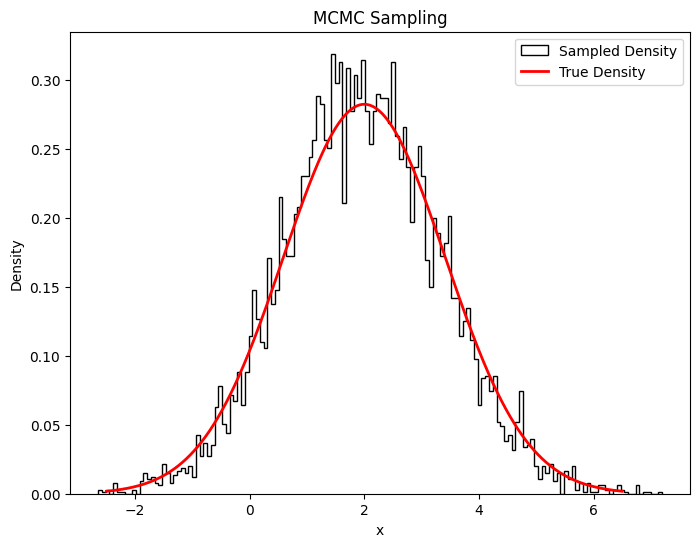

In [42]:
# Plot the results as a histogram with the true density over-plotted
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=150, density=True, label='Sampled Density',histtype='step',edgecolor='k')
x_range = np.linspace(-2.5, 6.5, 10000)
true_density = target_distribution(x_range)
plt.plot(x_range, true_density, 'r', linewidth=2, label='True Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('MCMC Sampling')
plt.show()

Figure 5: This is a plot of the histogram samples vs. x from the target distribution, which was generated using the Gaussian function, along with the pdf of the proposed distribution, which is a normal distribution with mean 2 and variance 2. We can see that the proposed distribution is a good fit for the target distribution, as expected.